In [58]:
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Đọc dữ liệu

In [59]:
sale = pd.read_excel('Sales.xlsx')
sale.head(5)

,Quarter,Quantity,Sale
0,2021Q1,735,68.0022
1,2021Q2,330,30.5316
2,2021Q3,560,57.5680
3,2021Q4,750,77.1000
4,2022Q1,730,75.0440


In [60]:
# Convert 'Quarter' to datetime and set it as the index
sale['Quarter'] = pd.to_datetime(sale['Quarter'].str.replace('Q', '-'), format='%Y-%m')
sale = sale.set_index('Quarter')


In [61]:
sale.head(5)

,Quantity,Sale
Quarter,,
2021-01-01,735,68.0022
2021-02-01,330,30.5316
2021-03-01,560,57.5680
2021-04-01,750,77.1000
2022-01-01,730,75.0440


# Bước 1: Xác định tham số  p,d,q 

## 1.1 Tách trend, mùa , resid


In [62]:
result2 = seasonal_decompose(sale['Sale'], model='addictive', period=1)
result = seasonal_decompose(sale['Quantity'], model='addictive',period=1)

## 1.2 Vẽ biểu đồ

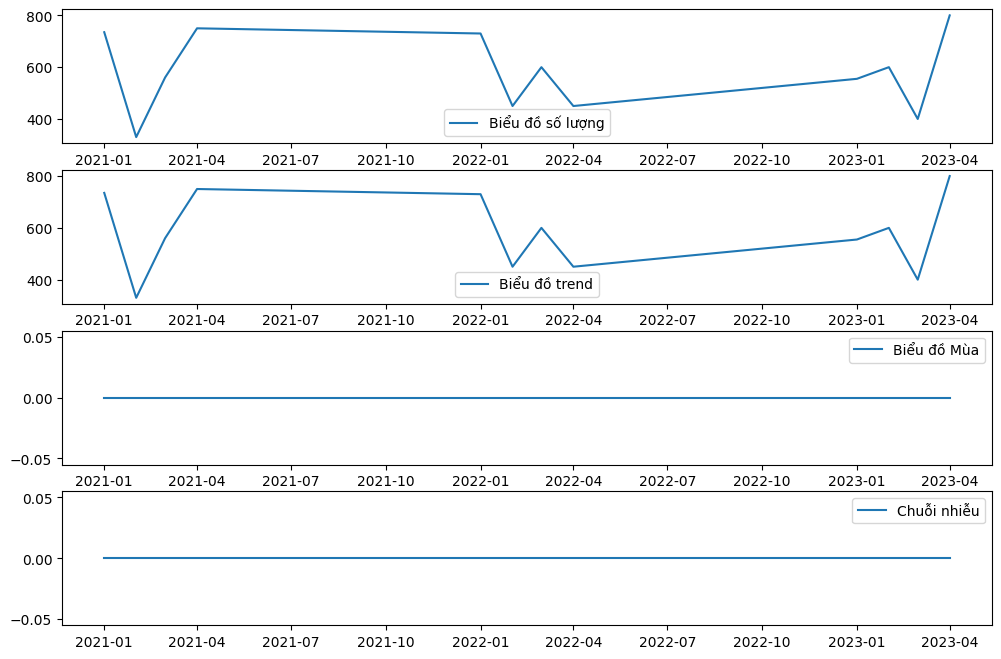

In [63]:
# Dãy Quantity

plt.figure(figsize=(12, 8))

# Biểu đồ số lượng
plt.subplot(4, 1, 1)
plt.plot(sale['Quantity'], label='Biểu đồ số lượng')
plt.legend()

# Tách trend
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Biểu đồ trend')
plt.legend()

# Tách mùa
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Biểu đồ Mùa')
plt.legend()

# Tách nhiễu
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Chuỗi nhiễu')
plt.legend()

plt.show()


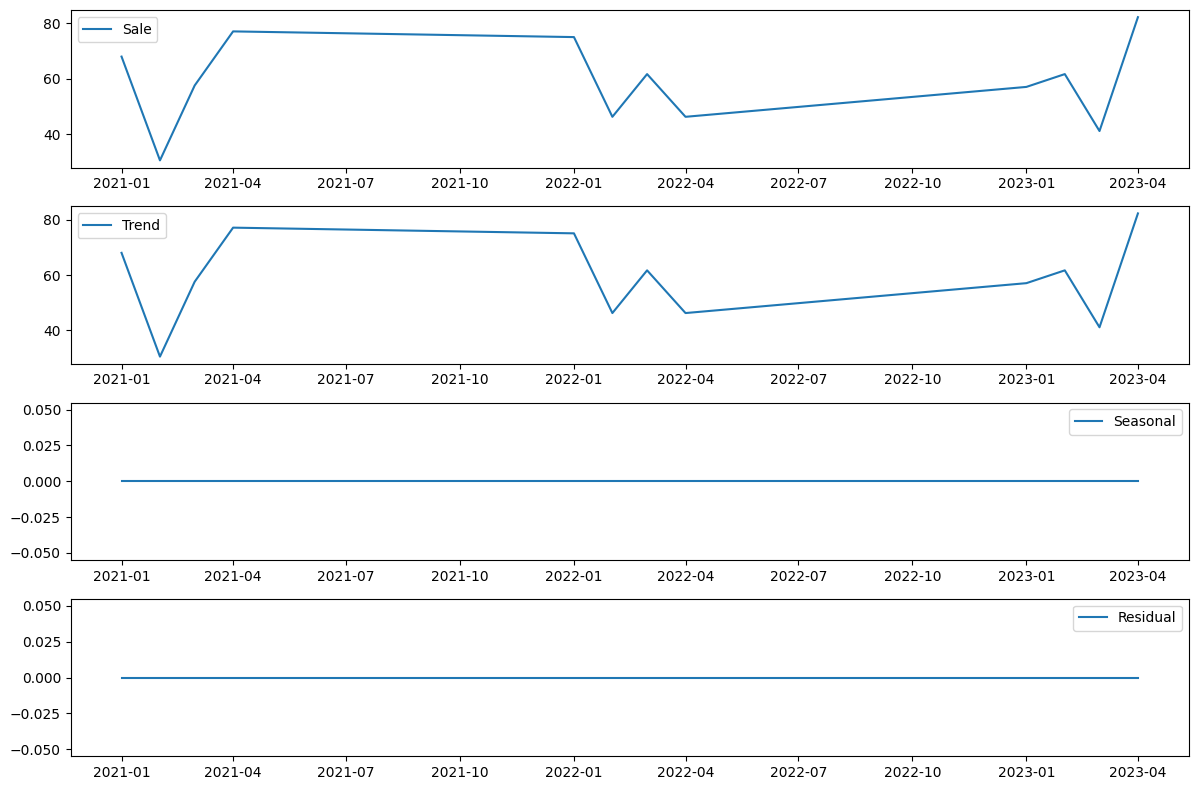

In [64]:
import matplotlib.pyplot as plt

# Dãy sale
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Biểu đồ sale
plt.subplot(4, 1, 1)
plt.plot(sale['Sale'], label='Sale')
plt.legend()

# Biểu đồ Trend
plt.subplot(4, 1, 2)
plt.plot(result2.trend, label='Trend')
plt.legend()

# Biểu đồ Mùa
plt.subplot(4, 1, 3)
plt.plot(result2.seasonal, label='Seasonal')
plt.legend()

# Biểu đồ Nhiễu
plt.subplot(4, 1, 4)
plt.plot(result2.resid, label='Residual')  # Fix the label to 'Residual'
plt.legend()

plt.tight_layout()
plt.show()


### Nhận xét
- Tính mùa không rõ ràng -> Không có thông tin về mùa 
- Tính xu thế không rõ ràng
- Đ bt có phải t vẽ nhầm không nma sao 2 cái giống nhau vcl thế. Thê này thì tương quan nó phải max ping


## 1.3 Kiểm định ADF cho dữ liệu ( tính dừng)

### Quantity

In [65]:
adf1 = adfuller(sale['Quantity'], regression='c', maxlag = 4)
print(f"ADF Stat: {adf1[0]}")
print(f"P-value: {adf1[1]}")

ADF Stat: -3.5590826851859325
P-value: 0.006593221180946816


### Nhận xét 
- P-value: Chuỗi đã cho là chuỗi dừng 

### Sales

In [66]:
adf2 = adfuller(sale['Sale'], regression='c', maxlag = 4)
print(f"ADF Stat: {adf1[0]}")
print(f"P-value: {adf1[1]}")

ADF Stat: -3.5590826851859325
P-value: 0.006593221180946816


### Nhận xét 
- P-value: Chuỗi đã cho là chuỗi dừng 

# Bước 2: Ước lượng mô hình 


In [67]:
sale_sale = sale['Sale']

### Vẽ đồ thị ACF,PACF

### PACF và ACF của Sale


In [68]:
sale_sale

Quarter
2021-01-01    68.0022
2021-02-01    30.5316
2021-03-01    57.5680
2021-04-01    77.1000
2022-01-01    75.0440
2022-02-01    46.2600
2022-03-01    61.6800
2022-04-01    46.2600
2023-01-01    57.0540
2023-02-01    61.6800
2023-03-01    41.1200
2023-04-01    82.2400
Name: Sale, dtype: float64

In [69]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Biểu đồ PACF')

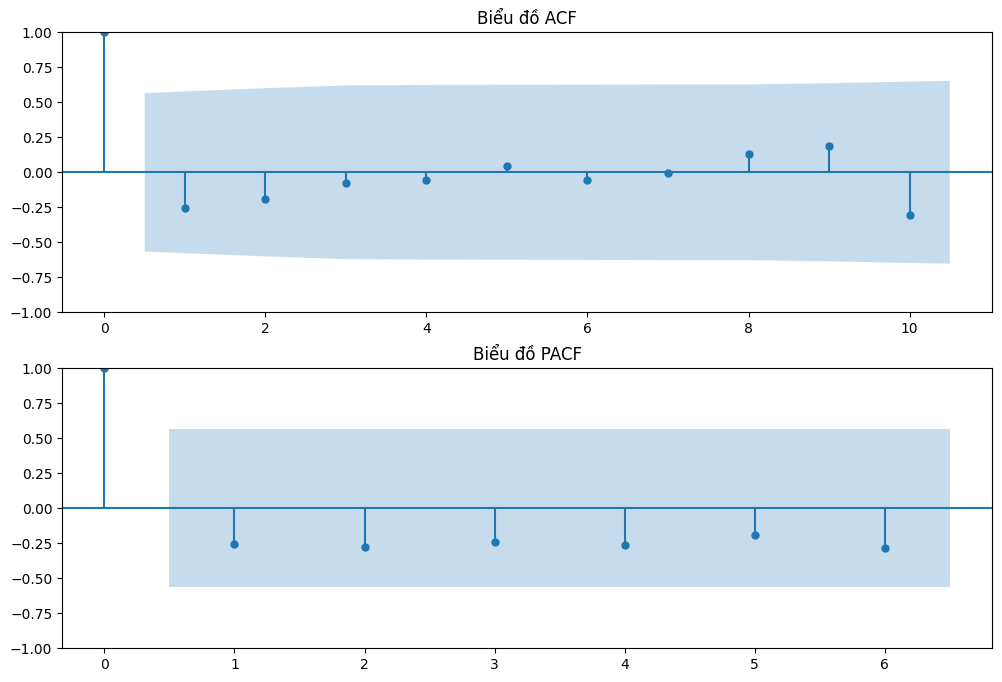

In [84]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (12,8))
plot_acf(sale_sale, lags=10, ax = ax1)
ax1.set_title('Biểu đồ ACF')
plot_pacf(sale_sale, lags=6, ax = ax2)
ax2.set_title('Biểu đồ PACF')
# plot_acf(sale_sale, lags = 5)
# plot_pacf(sale_sale, lags = 5)

#### Nhận xét:
Chọn bậc cho chuỗi Sale
- ACF: Chọn q: 1, 9, 10
- PACF: Chọn p: 1, 2, 3

### Ước lượng mô hình cho chuỗi Sale
- Các mô hình đã lựa chọn: 
    - ARIMA(1,1,1), ARIMA(1,1,9), ARIMA(1,1,10)
    - ARIMA(2,1,1), ARIMA(2,1,9), ARIMA(2,1,10)
    - ARIMA(3,1,1), ARIMA(3,1,9), ARIMA(3,1,10)
    

### Thư viện


In [71]:
# Import mô hình ARIMA
from statsmodels.tsa.arima.model import ARIMA

### ARIMA(1,1,1)

In [72]:

model_sale_1  = ARIMA(sale_sale, order=(1,1,0)).fit()

print(model_sale_1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -48.911
Date:                Fri, 12 Jan 2024   AIC                            101.823
Time:                        19:41:00   BIC                            102.618
Sample:                             0   HQIC                           101.321
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6077      0.331     -1.834      0.067      -1.257       0.042
sigma2       408.9166    229.894      1.779      0.075     -41.668     859.501
Ljung-Box (L1) (Q):                   0.21   Jarque-

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Nhận xét: 
Với mô hình ARIMA(1,1,1)
- Các tham số không có tính thống kê (P-value lớn ở MA(1))
- Mô hình không có tính ARCH
- Cần thử các mô hình khác 


### ARIMA(1,1,9)

In [73]:
model_sale_2 = ARIMA(sale_sale, order=(1,1,9)).fit()
print(model_sale_2.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                 ARIMA(1, 1, 9)   Log Likelihood                 -45.536
Date:                Fri, 12 Jan 2024   AIC                            113.071
Time:                        19:41:01   BIC                            117.448
Sample:                             0   HQIC                           110.312
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8485     42.042     -0.020      0.984     -83.249      81.552
ma.L1         -0.7008   1.09e+04  -6.43e-05      1.000   -2.14e+04    2.14e+04
ma.L2         -1.1769   6823.291     -0.000      1.0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Nhận xét:
- Mô hình hơi đểu, các hệ số có P-value lớn -> không có ý nghĩa về thống kê
- Mô hình không có tương quan (JB test)
- Phần dư tuân theo phân phối chuẩn 
- Mô hình không có tính ARCH 
-> Cần thêm mô hình khác 

### ARIMA(1,1,10)


In [74]:
model_sale_3 = ARIMA(sale_sale, order = (1,1,10)).fit()
print(model_sale_3.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                ARIMA(1, 1, 10)   Log Likelihood                 -45.088
Date:                Fri, 12 Jan 2024   AIC                            114.176
Time:                        19:41:01   BIC                            118.951
Sample:                             0   HQIC                           111.167
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7361      3.937     -0.187      0.852      -8.452       6.980
ma.L1         -0.5324    212.519     -0.003      0.998    -417.062     415.997
ma.L2         -1.0503    648.203     -0.002      0.9

#### Nhận xét:


### ARIMA(2,1,1)

In [75]:
model_sale_4 = ARIMA(sale_sale,order=(2,1,1)).fit()
print(model_sale_4.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -46.596
Date:                Fri, 12 Jan 2024   AIC                            101.192
Time:                        19:41:01   BIC                            102.784
Sample:                             0   HQIC                           100.189
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2618      0.392     -0.668      0.504      -1.030       0.506
ar.L2         -0.2920      0.386     -0.757      0.449      -1.048       0.464
ma.L1         -0.9998    457.135     -0.002      0.9

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Nhận xét:

### ARIMA(2,1,9)

In [76]:
model_sale_5 = ARIMA(sale_sale, order=(2,1,9)).fit()
print(model_sale_5.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                 ARIMA(2, 1, 9)   Log Likelihood                 -44.961
Date:                Fri, 12 Jan 2024   AIC                            113.921
Time:                        19:41:01   BIC                            118.696
Sample:                             0   HQIC                           110.911
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4175     27.228     -0.052      0.958     -54.783      51.948
ar.L2         -0.6221     28.923     -0.022      0.983     -57.311      56.067
ma.L1         -0.1553    675.394     -0.000      1.0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Nhận xét:


### ARIMA(2,1,10)

In [77]:
model_sale_6 = ARIMA(sale_sale,order=(2,1,[10])).fit()
print(model_sale_6.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:              ARIMA(2, 1, [10])   Log Likelihood                 -46.978
Date:                Fri, 12 Jan 2024   AIC                            101.957
Time:                        19:41:01   BIC                            103.548
Sample:                             0   HQIC                           100.953
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6540      0.352     -1.856      0.063      -1.344       0.037
ar.L2         -0.3856      0.271     -1.423      0.155      -0.917       0.146
ma.L10        -0.9992   1610.922     -0.001      1.0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

#### Nhận xét

### ARIMA(3,1,1)

In [78]:
model_sale_7 = ARIMA(sale_sale, order = (3,1,1)).fit()
print(model_sale_7.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -46.416
Date:                Fri, 12 Jan 2024   AIC                            102.831
Time:                        19:41:01   BIC                            104.821
Sample:                             0   HQIC                           101.577
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3540      0.794     -0.446      0.656      -1.911       1.203
ar.L2         -0.3413      0.661     -0.516      0.606      -1.637       0.955
ar.L3         -0.2376      0.611     -0.389      0.6

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Nhận xét:


### ARIMA(3,1,9)

In [79]:
model_sale_8 = ARIMA(sale_sale, order=(3,1,[9])).fit()
print(model_sale_8.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:               ARIMA(3, 1, [9])   Log Likelihood                 -46.993
Date:                Fri, 12 Jan 2024   AIC                            103.985
Time:                        19:41:02   BIC                            105.975
Sample:                             0   HQIC                           102.731
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7215      0.611     -1.181      0.237      -1.919       0.476
ar.L2         -0.6814      0.644     -1.058      0.290      -1.944       0.581
ar.L3         -0.3558      0.563     -0.632      0.5

### ARIMA(3,1,10)

In [80]:
model_sale_9 = ARIMA(sale_sale, order=(3,1,[10])).fit()
print(model_sale_9.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:              ARIMA(3, 1, [10])   Log Likelihood                 -46.590
Date:                Fri, 12 Jan 2024   AIC                            103.179
Time:                        19:41:02   BIC                            105.169
Sample:                             0   HQIC                           101.925
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7763      0.432     -1.796      0.073      -1.624       0.071
ar.L2         -0.5785      0.372     -1.555      0.120      -1.307       0.150
ar.L3         -0.2592      0.359     -0.722      0.4

### ARIMA(3,1,0)

In [81]:
model_sale_10 = ARIMA(sale_sale, order = (3,1,0)).fit()
print(model_sale_10.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -47.763
Date:                Fri, 12 Jan 2024   AIC                            103.526
Time:                        19:41:02   BIC                            105.117
Sample:                             0   HQIC                           102.522
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8295      0.500     -1.658      0.097      -1.810       0.151
ar.L2         -0.6475      0.490     -1.322      0.186      -1.608       0.313
ar.L3         -0.3278      0.582     -0.563      0.5

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


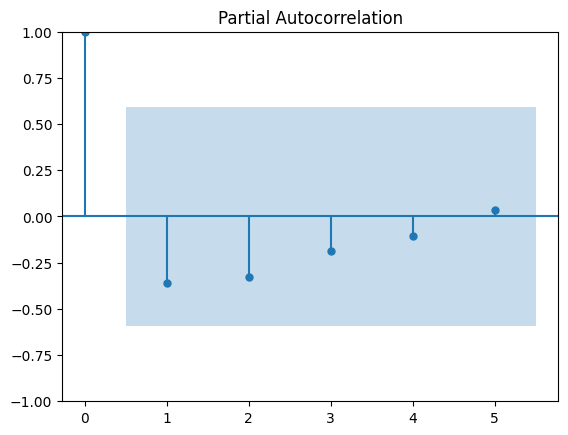

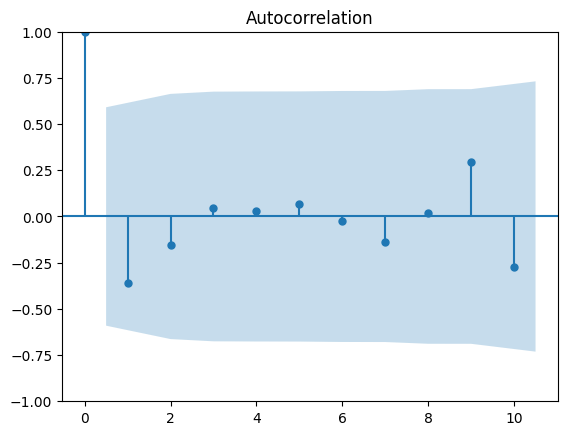

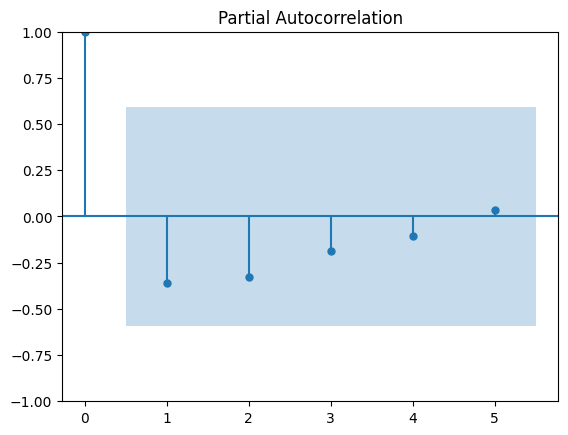

In [82]:
plot_acf(sale_quantity,lags = 10)
plot_pacf(sale_quantity, lags = 5)